In [38]:
import glob
from pathlib import Path

import random

import numpy as np
from numba import njit

from PIL import Image
from matplotlib import pyplot as plt

In [78]:
def load_images(path: Path, thumbnail_shape: tuple) -> list[np.ndarray]:
    files = glob.glob(path.as_posix())
    images = []
    for f in files:
        img = Image.open(f).convert('L')
        img.thumbnail(thumbnail_shape, Image.Resampling.BICUBIC)
        img = np.array(img)
        img = -1+(img-img.min())/(img.max()-img.min())*(1-(-1))
        images.append(img)
    return images

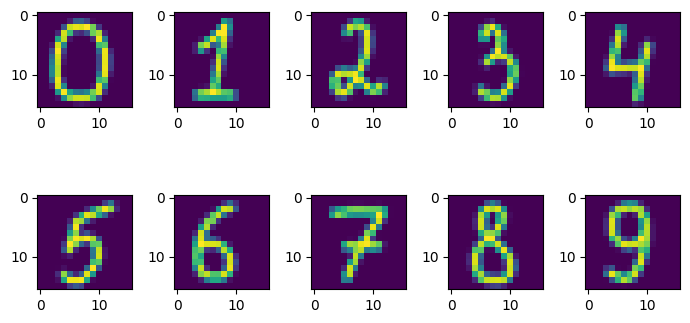

In [88]:
images = load_images(Path('..', '..', 'data', 'images', 'numbers', '*'), (16, 16))

fig, axes = plt.subplots(nrows=2, ncols=5)

fig.set_figwidth(7)
fig.set_figheight(4)

for i, ax in enumerate(axes.ravel()):
    ax.imshow(images[i])

plt.autoscale()
plt.tight_layout()
plt.show()

In [124]:
class Retina:
    def __init__(self, nIn: int, p: float, a: float) -> None:
        self.nIn = nIn
        self.mshape = (nIn, nIn)
        
        self.w = np.zeros(self.mshape)
        
        self.p = p
        self.a = a

    def update(self, x: np.ndarray):
        u = x*x.reshape((x.size, 1))
        self.w = self.p*self.w+self.a*u
        self.w *= 1-np.eye(self.nIn)

    def reconstruct(self, x: np.ndarray, niter: int = 1):
        y = x.copy()
        for i in range(niter):
            y = np.dot(self.w, y)
        return y

In [143]:
n = 16
nIn = n*n
img_shape = (n, n)
mem_shape = (nIn, nIn)

p = 0.8
a = 0.2

noise = 0.0

model = Retina(nIn, p, a)

for k in range(100):
    for i in np.random.permutation(10):
        model.update(images[i].flatten())

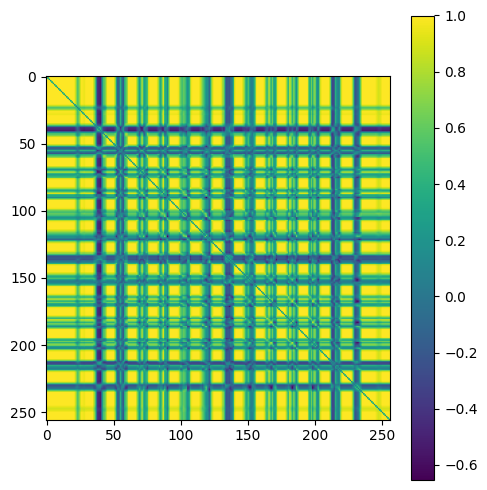

In [148]:
fig1, axes1 = plt.subplots(1, figsize=(5, 5), dpi=100)

img = axes1.imshow(model.w, cmap='viridis')

plt.colorbar(img)

plt.autoscale()
plt.tight_layout()
plt.show()

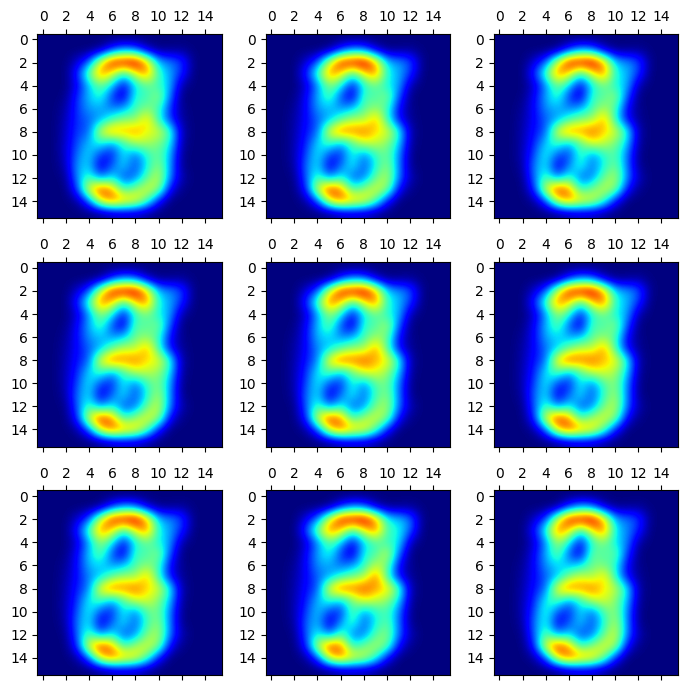

In [149]:
fig2, axes2 = plt.subplots(nrows=3, ncols=3, figsize=(7, 7), dpi=100)

for i in range(3):
    for j in range(3):
        index = 3*i+j
        if index < len(images):
            img = images[index].flatten()
            res = model.reconstruct(img, 1).transpose().reshape(img_shape)
            axes2[i][j].matshow(res, cmap='jet',
                                interpolation='bicubic')

plt.autoscale()
plt.tight_layout()
plt.show()